/home/chen/u-net/
/home/chen/u-net/2020-05-10-01-46/log_0.log
       dice_coef      loss       lr  val_dice_coef  val_loss
epoch                                                       
0       0.070033  0.929967  0.00005       0.220255  0.779745
1       0.528344  0.471656  0.00005       0.311949  0.688051
2       0.852837  0.147163  0.00005       0.259073  0.740927
3       0.908783  0.091217  0.00005       0.303585  0.696415
4       0.927948  0.072052  0.00005       0.323554  0.676446
=-=-=-=-=-=-=-=-=-=-
       dice_coef      loss       lr  val_dice_coef  val_loss
epoch                                                       
0       0.070033  0.929967  0.00005       0.220255  0.779745
1       0.528344  0.471656  0.00005       0.311949  0.688051
2       0.852837  0.147163  0.00005       0.259073  0.740927
3       0.908783  0.091217  0.00005       0.303585  0.696415
4       0.927948  0.072052  0.00005       0.323554  0.676446
/home/chen/u-net/2020-05-10-15-02/log_0.log
       dice_coef   

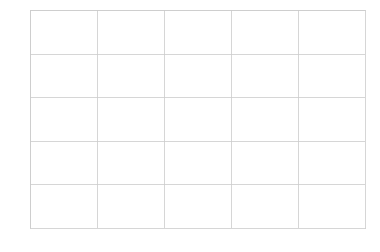

In [3]:
import numpy as np
import cv2
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
train_cl = "#f781bf"
valid_cl = '#4daf4a'
plt.tick_params(colors='white')

sns.set_style('whitegrid')


rootpath = os.getcwd()[:-4]
print (rootpath) #/home/chen/u-net/
t_list = glob.glob(rootpath+"2020*/")
#t_list = glob.glob(rootpath+"ct*/")
#t_list.extend(glob.glob(rootpath+"2020*/"))
t_list =sorted(t_list)

train_list = []
for i in range(len(t_list)):
    if len(glob.glob(t_list[i]+"*.hdf5")) != 0:
    #if len(glob.glob(t_list[i]+"*.log")) != 0:
        train_list.append(t_list[i])
#print (train_list)
        
for i in range(len(train_list)):
    logs_path = glob.glob(train_list[i]+"log_*.log")
    logs_path = sorted(logs_path)
    dfs = []
    for log_path in logs_path:
        df = pd.read_csv(log_path)
        df.set_index(["epoch"], inplace=True)
        df.dropna(axis=1,how='any')
        print (log_path)
        print (df.head(5))
        print ("=-"*10)
        dfs.append(df)
    DF = pd.concat(dfs)
    print (DF.head(5))
    DF.to_csv(train_list[i]+"totallog.log")

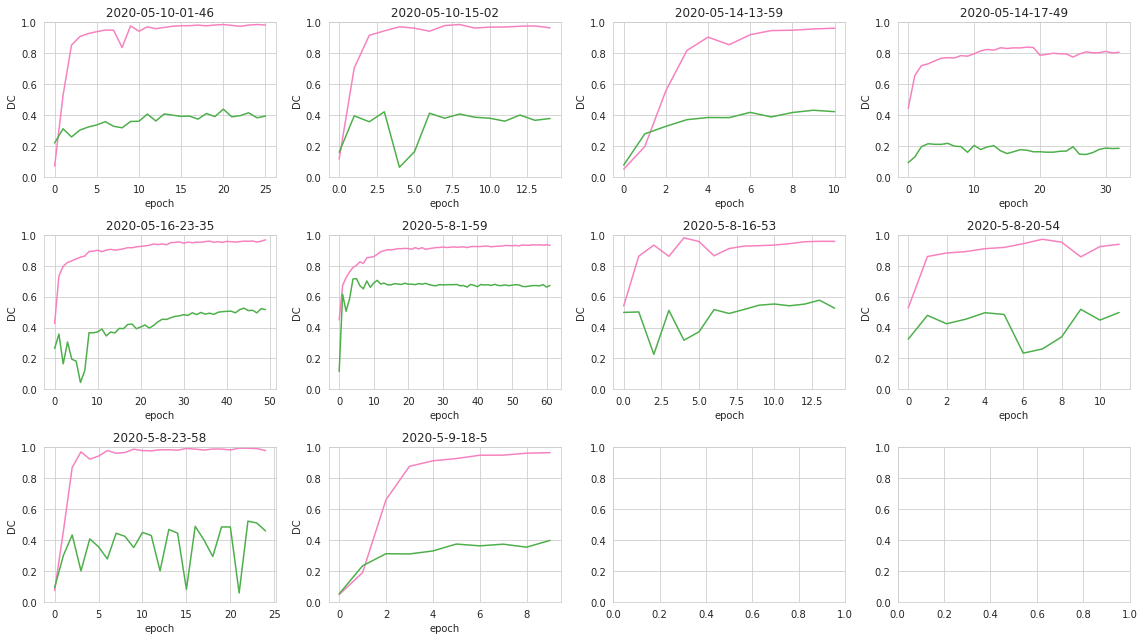

In [4]:
meyasu = math.ceil(len(train_list)/4)

fig, axes = plt.subplots(math.ceil(len(train_list)/4),4, figsize=(16,meyasu*3))

for m in range(math.ceil(len(train_list)/4)):
    for n in range(4):
        i = m*4+n   

        try:
            train_dir_name = train_list[i].replace(rootpath,' ')
            #print ("1",train_dir_name)
            train_dir_name = train_dir_name.replace('/',' ')
            #print ("2",train_dir_name)
            #logs = glob.glob(train_list[i]+ "log_*.log")
            logs = glob.glob(train_list[i]+ "totallog.log")
            #print ("there are {} logs.".format(len(logs)))
            logs = sorted(logs)
            df = pd.read_csv(logs[-1])  
            #print ("analysing case in", train_list[i])
        except IndexError:
            break
        

        #ax1= fig2.add_subplot(1,2,1)
        #axex[m][n]= fig2.add_subplot(1,1,1)
        axes[m][n].plot(range(len(df.dice_coef)),df.dice_coef,label="Training",color=train_cl)
        axes[m][n].plot(range(len(df.val_dice_coef)),df.val_dice_coef,label="Validation",color=valid_cl)
        axes[m][n].set_xlabel("epoch")
        axes[m][n].set_ylabel("DC")
        axes[m][n].set_ylim(0,1)
        #axes[m][n].legend()
        
    
        axes[m][n].title.set_text(train_dir_name)
fig.set_tight_layout(True)
plt.show()

In [5]:
train = '/home/chen/u-net/ct10/'
logs = glob.glob(train+"*.log")
logs = sorted(logs)
print (len(logs))
df = []
df0 = pd.read_csv(logs[0])
if len(logs)>1:
    for i in range(len(logs)):
        df[i] = pd.read_csv(logs[i+1])
        df0 = df0.append(df[i])

    

3


EmptyDataError: No columns to parse from file

In [27]:
df = pd.read_csv("/home/chen/u-net/2020-5-8-20-54/log_0.log")
print (df)

    epoch  dice_coef      loss      lr  val_dice_coef  val_loss
0       0   0.527043  0.472957  0.0005       0.324813  0.675187
1       1   0.859588  0.140412  0.0005       0.478744  0.521256
2       2   0.882267  0.117733  0.0005       0.424616  0.575384
3       3   0.891259  0.108741  0.0005       0.454058  0.545942
4       4   0.910111  0.089889  0.0005       0.495952  0.504048
5       5   0.918404  0.081596  0.0005       0.484871  0.515129
6       6   0.942471  0.057529  0.0005       0.234417  0.765583
7       7   0.971274  0.028726  0.0005       0.261653  0.738347
8       8   0.952212  0.047788  0.0005       0.339511  0.660489
9       9   0.857459  0.142541  0.0005       0.517917  0.482083
10     10   0.923628  0.076372  0.0005       0.448370  0.551630
11     11   0.938833  0.061167  0.0005       0.497429  0.502571


In [28]:

print (df)

       dice_coef      loss      lr  val_dice_coef  val_loss
epoch                                                      
0       0.527043  0.472957  0.0005       0.324813  0.675187
1       0.859588  0.140412  0.0005       0.478744  0.521256
2       0.882267  0.117733  0.0005       0.424616  0.575384
3       0.891259  0.108741  0.0005       0.454058  0.545942
4       0.910111  0.089889  0.0005       0.495952  0.504048
5       0.918404  0.081596  0.0005       0.484871  0.515129
6       0.942471  0.057529  0.0005       0.234417  0.765583
7       0.971274  0.028726  0.0005       0.261653  0.738347
8       0.952212  0.047788  0.0005       0.339511  0.660489
9       0.857459  0.142541  0.0005       0.517917  0.482083
10      0.923628  0.076372  0.0005       0.448370  0.551630
11      0.938833  0.061167  0.0005       0.497429  0.502571
